In [2]:
#Let's start with importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings("ignore")

# Reading the data from the excel sheet

In [3]:
#Read excel sheet and convert into Dataframe
data=pd.read_excel(r'D:\DataTrained\Flip Robo Technology Internship\Customer_retention_dataset\Datasheet.xlsx')
data

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,Female,21-30 years,Solan,173212,1-2 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,Android,...,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in
265,Female,31-40 years,Ghaziabad,201008,1-2 years,31-40 times,Mobile Internet,Smartphone,Others,Android,...,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com
266,Female,41-50 yaers,Bangalore,560010,2-3 years,Less than 10 times,Mobile internet,Laptop,Others,Window/windows Mobile,...,Amazon.in,Snapdeal.com,Amazon.in,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Amazon.in
267,Female,Less than 20 years,Solan,173229,2-3 years,Less than 10 times,Wi-Fi,Smartphone,5.5 inches,Android,...,Amazon.in,"Amazon.in, Myntra.com, Snapdeal.com",Amazon.in,"Amazon.in, Snapdeal.com",Amazon.in,Amazon.in,Amazon.in,"Myntra.com, Snapdeal.com","Myntra.com, Snapdeal.com",Amazon.in


In [4]:
#Lets see the columns present in the dataset
data.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

In [5]:
#Shape of the file
data.shape

(269, 71)

In [6]:
#Checking for data types of the columns
for column in data:
    print(column ,"------------", data[column].dtypes)

1Gender of respondent ------------ object
2 How old are you?  ------------ object
3 Which city do you shop online from? ------------ object
4 What is the Pin Code of where you shop online from? ------------ int64
5 Since How Long You are Shopping Online ? ------------ object
6 How many times you have made an online purchase in the past 1 year? ------------ object
7 How do you access the internet while shopping on-line? ------------ object
8 Which device do you use to access the online shopping? ------------ object
9 What is the screen size of your mobile device?						                                         ------------ object
10 What is the operating system (OS) of your device?				                                           ------------ object
11 What browser do you run on your device to access the website?			                                                           ------------ object
12 Which channel did you follow to arrive at your favorite online store for the first time?         

# 
As the datatype of almost all columns is of object type, it will have to encoded prior instantiating it into any machine learning model

In [7]:
# Checking for null values
for column in data:
    print(column ,"------------", data[column].isnull().sum())

1Gender of respondent ------------ 0
2 How old are you?  ------------ 0
3 Which city do you shop online from? ------------ 0
4 What is the Pin Code of where you shop online from? ------------ 0
5 Since How Long You are Shopping Online ? ------------ 0
6 How many times you have made an online purchase in the past 1 year? ------------ 0
7 How do you access the internet while shopping on-line? ------------ 0
8 Which device do you use to access the online shopping? ------------ 0
9 What is the screen size of your mobile device?						                                         ------------ 0
10 What is the operating system (OS) of your device?				                                           ------------ 0
11 What browser do you run on your device to access the website?			                                                           ------------ 0
12 Which channel did you follow to arrive at your favorite online store for the first time?                                                               

# 
There are no null values

# Visualization of the Data

Female    181
Male       88
Name: 1Gender of respondent, dtype: int64


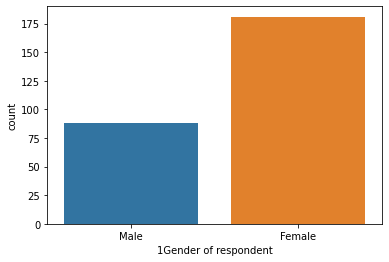

In [8]:
ax=sns.countplot(x="1Gender of respondent", data=data)
print(data["1Gender of respondent"].value_counts())

31-40 years           81
21-30 years           79
41-50 yaers           70
Less than 20 years    20
51 years and above    19
Name: 2 How old are you? , dtype: int64


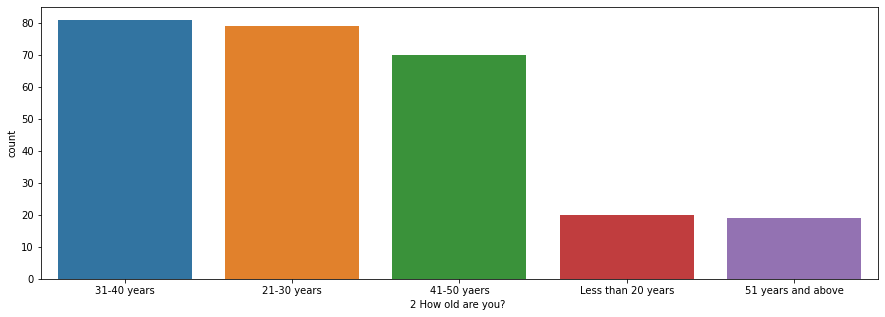

In [9]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x="2 How old are you? ", data=data)
print(data["2 How old are you? "].value_counts())

Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Solan            18
Ghaziabad        18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: 3 Which city do you shop online from?, dtype: int64


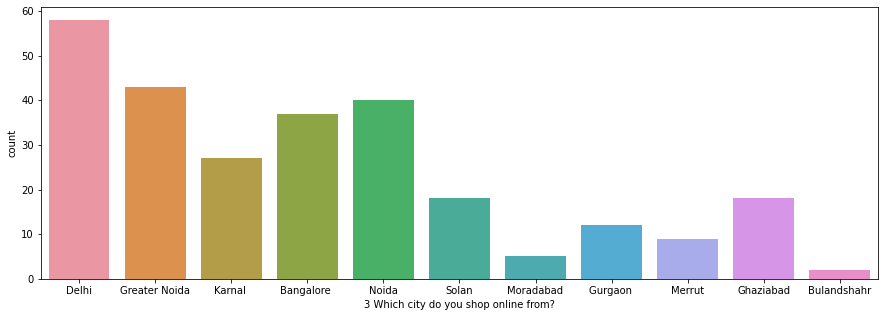

In [10]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x="3 Which city do you shop online from?", data=data)
print(data["3 Which city do you shop online from?"].value_counts())

201308    38
132001    19
201310    18
110044    16
250001     9
173229     9
173212     9
560010     8
132036     8
122018     8
560037     8
110008     7
110011     7
201306     7
110014     6
110018     6
201305     5
201008     5
201009     5
201312     5
244001     5
530068     5
122009     4
201001     4
560003     4
201304     4
110009     4
201303     4
560002     4
560018     4
110042     4
110030     4
201005     4
110039     4
560013     3
203001     2
203202     1
560001     1
203207     1
Name: 4 What is the Pin Code of where you shop online from?, dtype: int64


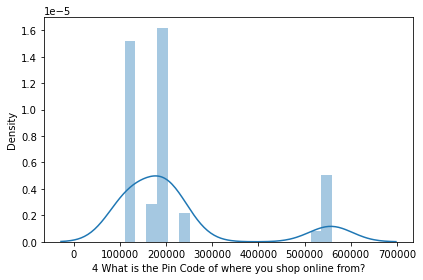

In [11]:
sns.distplot(data["4 What is the Pin Code of where you shop online from?"])
plt.xlabel("4 What is the Pin Code of where you shop online from?",fontsize=10)
plt.tight_layout()
print(data["4 What is the Pin Code of where you shop online from?"].value_counts())

Above 4 years       98
2-3 years           65
3-4 years           47
Less than 1 year    43
1-2 years           16
Name: 5 Since How Long You are Shopping Online ?, dtype: int64


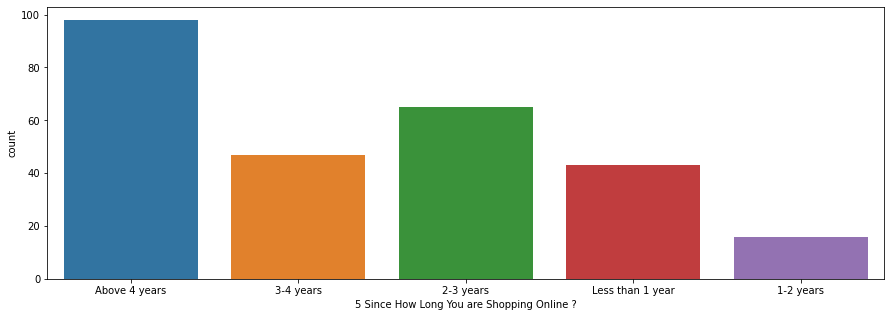

In [12]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x="5 Since How Long You are Shopping Online ?", data=data)
print(data["5 Since How Long You are Shopping Online ?"].value_counts())

Less than 10 times    114
31-40 times            63
41 times and above     47
11-20 times            29
21-30 times            10
42 times and above      6
Name: 6 How many times you have made an online purchase in the past 1 year?, dtype: int64


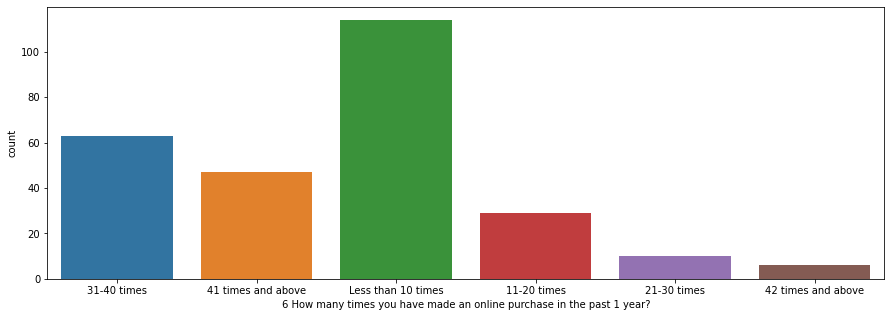

In [13]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x="6 How many times you have made an online purchase in the past 1 year?", data=data)
print(data["6 How many times you have made an online purchase in the past 1 year?"].value_counts())

Mobile internet    142
Wi-Fi               76
Mobile Internet     47
Dial-up              4
Name: 7 How do you access the internet while shopping on-line?, dtype: int64


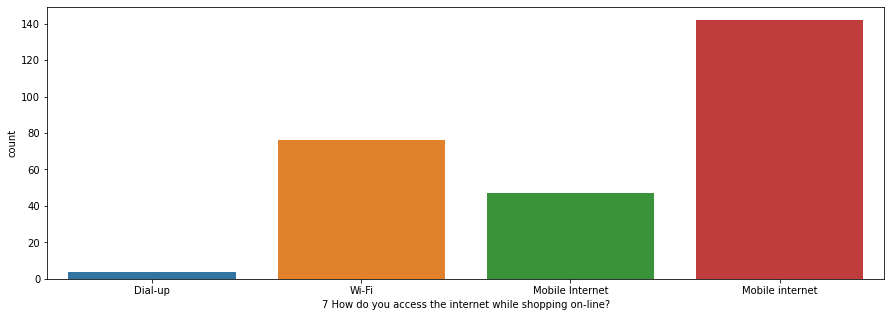

In [14]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x="7 How do you access the internet while shopping on-line?", data=data)
print(data["7 How do you access the internet while shopping on-line?"].value_counts())

Smartphone    141
Laptop         86
Desktop        30
Tablet         12
Name: 8 Which device do you use to access the online shopping?, dtype: int64


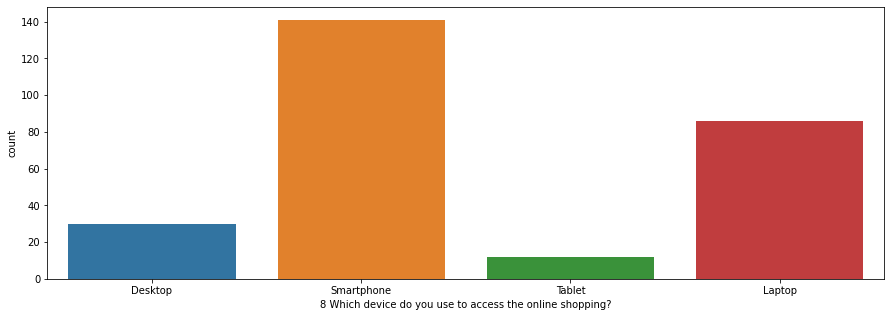

In [15]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x="8 Which device do you use to access the online shopping?", data=data)
print(data["8 Which device do you use to access the online shopping?"].value_counts())

Others        134
5.5 inches     99
4.7 inches     29
5 inches        7
Name: 9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        , dtype: int64


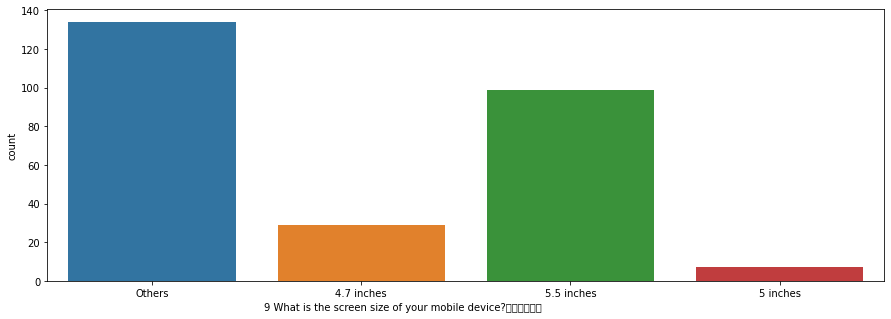

In [16]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x="9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ", data=data)
print(data["9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        "].value_counts())

Window/windows Mobile    122
Android                   85
IOS/Mac                   62
Name: 10 What is the operating system (OS) of your device?\t\t\t\t                                          , dtype: int64


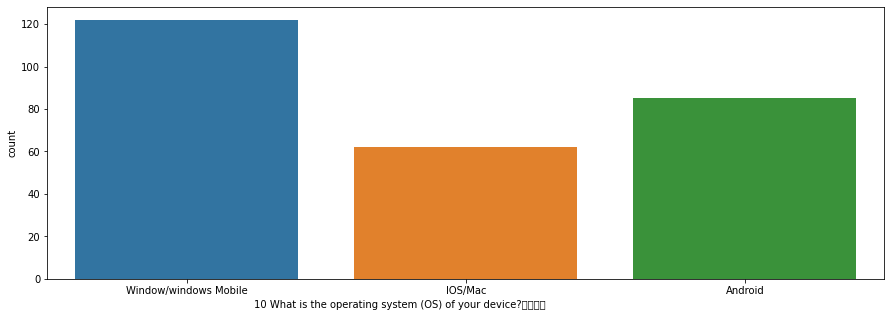

In [17]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x="10 What is the operating system (OS) of your device?\t\t\t\t                                          ", data=data)
print(data["10 What is the operating system (OS) of your device?\t\t\t\t                                          "].value_counts())

Google chrome      216
Safari              40
Opera                8
Mozilla Firefox      5
Name: 11 What browser do you run on your device to access the website?\t\t\t                                                          , dtype: int64


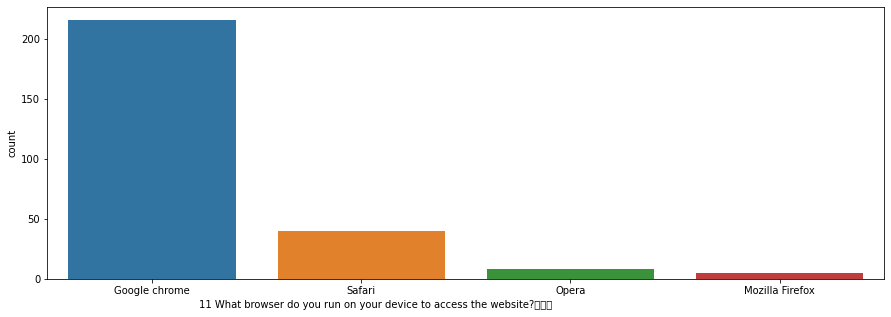

In [18]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x="11 What browser do you run on your device to access the website?\t\t\t                                                          ", data=data)
print(data["11 What browser do you run on your device to access the website?\t\t\t                                                          "].value_counts())

Search Engine        230
Content Marketing     20
Display Adverts       19
Name: 12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   , dtype: int64


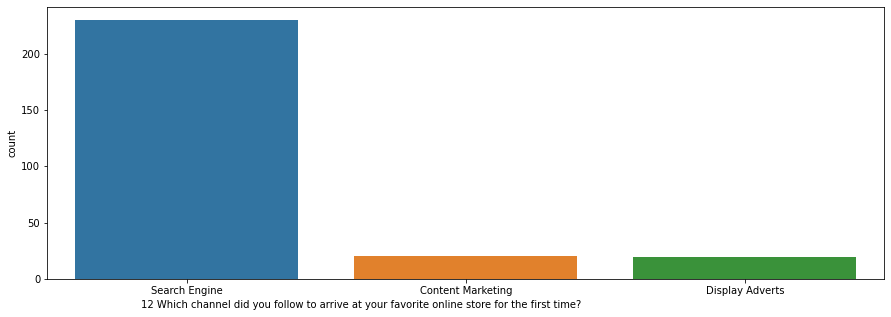

In [19]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x="12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ", data=data)
print(data["12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   "].value_counts())

Search Engine      87
Via application    86
Direct URL         70
E-mail             18
Social Media        8
Name: 13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   , dtype: int64


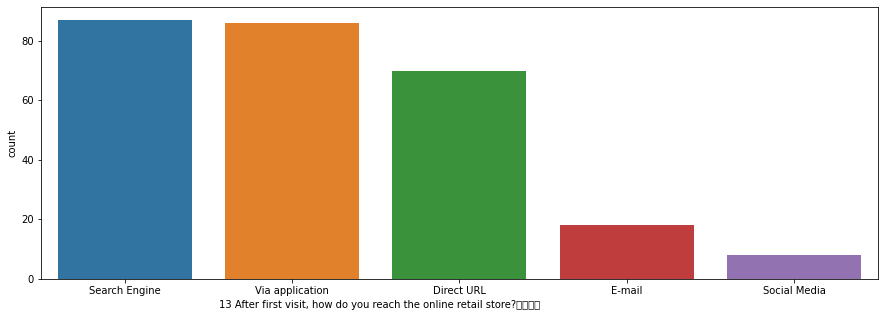

In [20]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x="13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   ", data=data)
print(data["13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   "].value_counts())

more than 15 mins    123
6-10 mins             71
11-15 mins            46
Less than 1 min       15
1-5 mins              14
Name: 14 How much time do you explore the e- retail store before making a purchase decision?                                                                   , dtype: int64


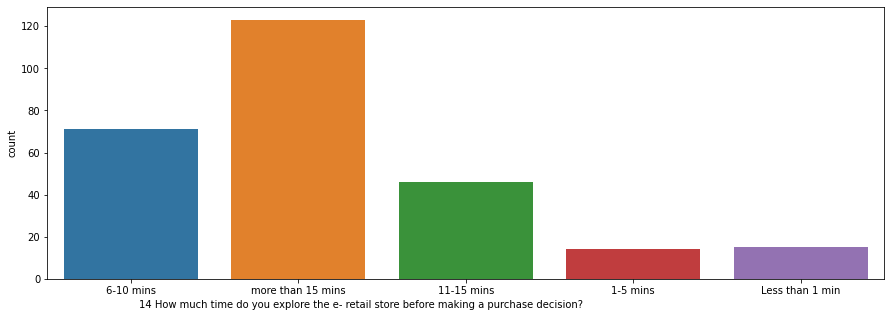

In [21]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x="14 How much time do you explore the e- retail store before making a purchase decision?                                                                   ", data=data)
print(data["14 How much time do you explore the e- retail store before making a purchase decision?                                                                   "].value_counts())

Credit/Debit cards                    148
Cash on delivery (CoD)                 76
E-wallets (Paytm, Freecharge etc.)     45
Name: 15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                               , dtype: int64


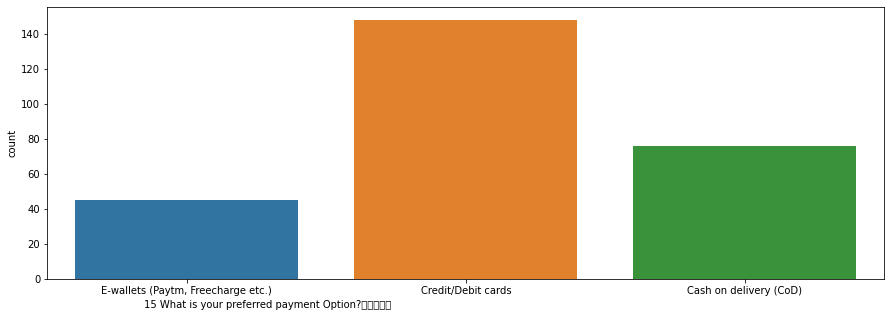

In [22]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x="15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                               ", data=data)
print(data["15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                               "].value_counts())

Sometimes          171
Never               48
Frequently          35
Very frequently     15
Name: 16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                   , dtype: int64


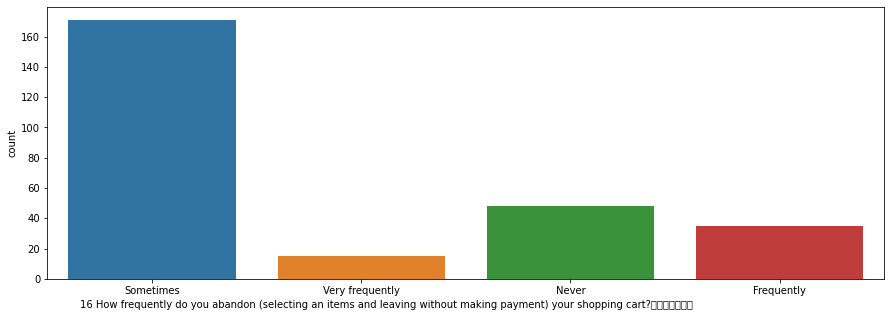

In [23]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x="16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                   ", data=data)
print(data["16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                   "].value_counts())

Better alternative offer        133
Promo code not applicable        54
Change in price                  37
Lack of trust                    31
No preferred mode of payment     14
Name: 17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                       , dtype: int64


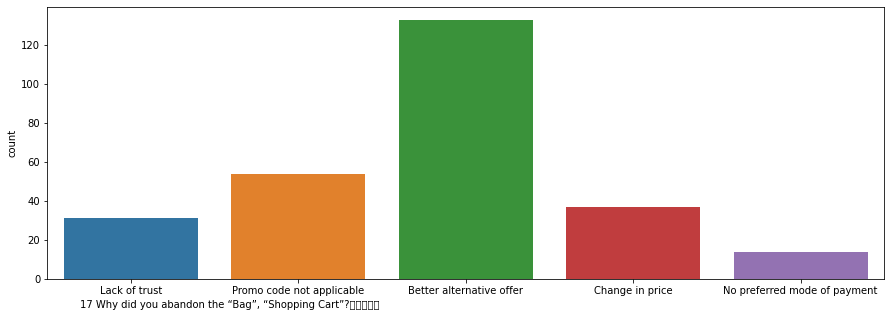

In [24]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x="17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                       ", data=data)
print(data["17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                       "].value_counts())

Strongly agree (5)       164
Agree (4)                 80
Strongly disagree (1)     18
Indifferent (3)            7
Name: 18 The content on the website must be easy to read and understand, dtype: int64


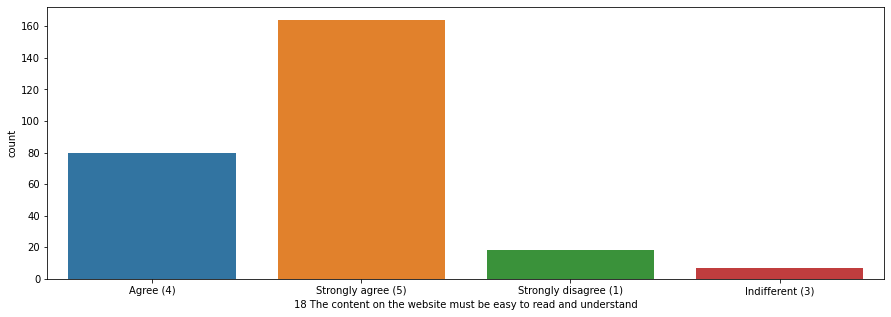

In [25]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x="18 The content on the website must be easy to read and understand", data=data)
print(data["18 The content on the website must be easy to read and understand"].value_counts())

Strongly agree (5)    116
Agree (4)              92
Indifferent (3)        43
Dis-agree (2)          18
Name: 19 Information on similar product to the one highlighted  is important for product comparison, dtype: int64


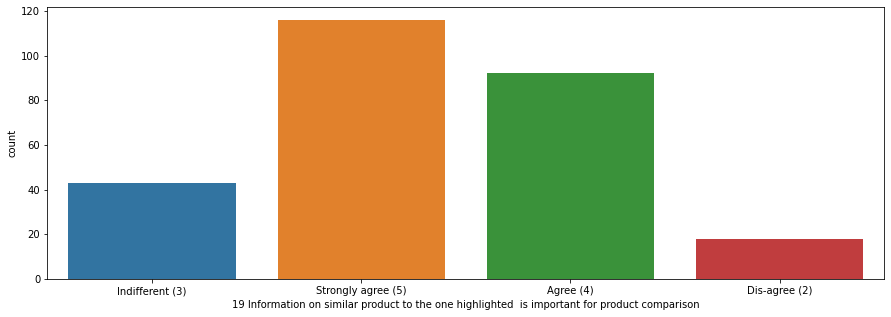

In [26]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x="19 Information on similar product to the one highlighted  is important for product comparison", data=data)
print(data["19 Information on similar product to the one highlighted  is important for product comparison"].value_counts())

Agree (4)                101
Strongly agree (5)        87
Indifferent (3)           52
Dis-agree (2)             18
Strongly disagree (1)     11
Name: 20 Complete information on listed seller and product being offered is important for purchase decision., dtype: int64


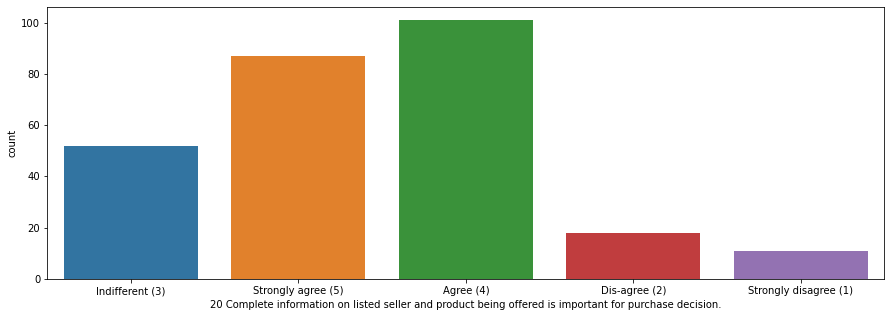

In [27]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x="20 Complete information on listed seller and product being offered is important for purchase decision.", data=data)
print(data["20 Complete information on listed seller and product being offered is important for purchase decision."].value_counts())

Agree (4)                132
Strongly agree (5)       107
Strongly disagree (1)     18
Dis-agree (2)             12
Name: 21 All relevant information on listed products must be stated clearly, dtype: int64


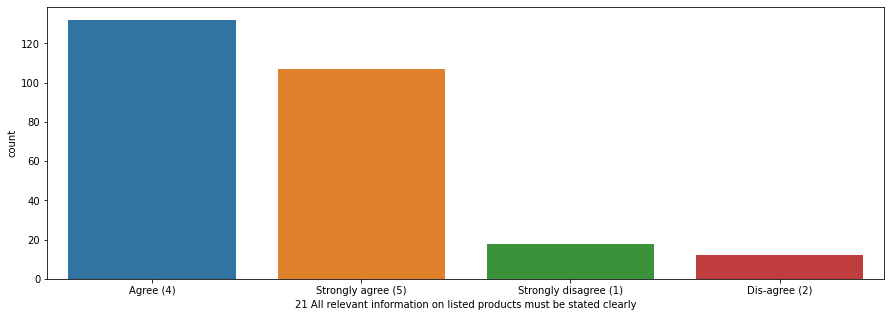

In [28]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x="21 All relevant information on listed products must be stated clearly", data=data)
print(data["21 All relevant information on listed products must be stated clearly"].value_counts())

Strongly agree (5)       141
Agree (4)                105
Strongly disagree (1)     18
Dis-agree (2)              5
Name: 22 Ease of navigation in website, dtype: int64


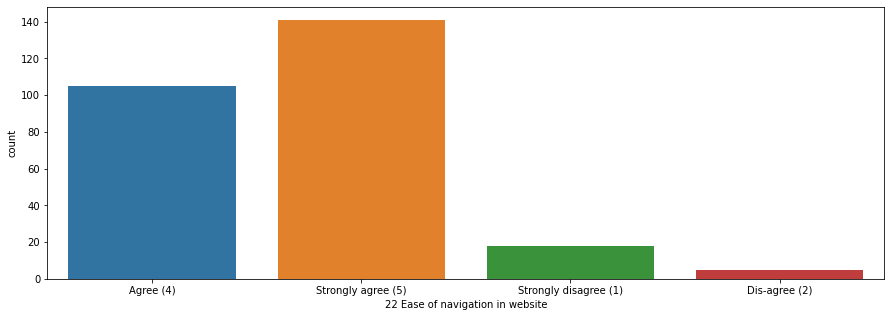

In [29]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x="22 Ease of navigation in website", data=data)
print(data["22 Ease of navigation in website"].value_counts())

Strongly agree (5)       115
Agree (4)                112
Dis-agree (2)             18
Strongly disagree (1)     12
Indifferent (3)           12
Name: 23 Loading and processing speed, dtype: int64


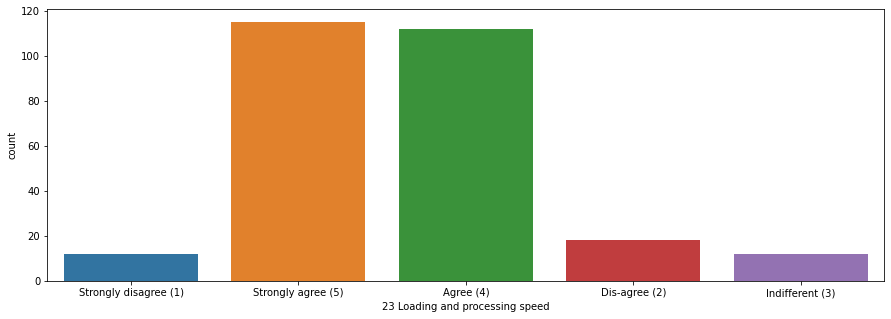

In [30]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x="23 Loading and processing speed", data=data)
print(data["23 Loading and processing speed"].value_counts())

Strongly agree (5)       189
Agree (4)                 45
Strongly disagree (1)     18
Dis-agree (2)             12
Indifferent (3)            5
Name: 24 User friendly Interface of the website, dtype: int64


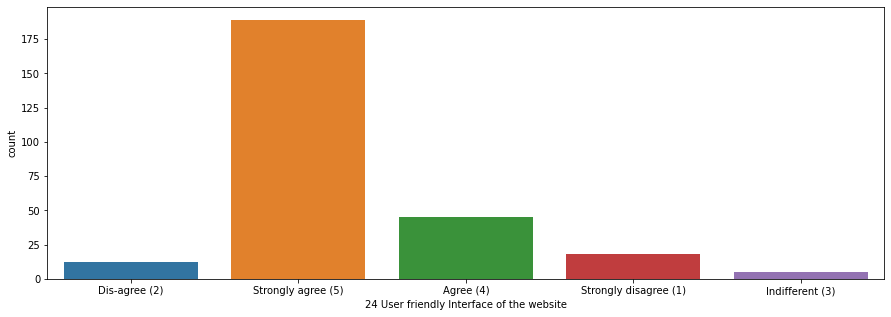

In [31]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x="24 User friendly Interface of the website", data=data)
print(data["24 User friendly Interface of the website"].value_counts())

Strongly agree (5)    159
Agree (4)              80
Dis-agree (2)          30
Name: 25 Convenient Payment methods, dtype: int64


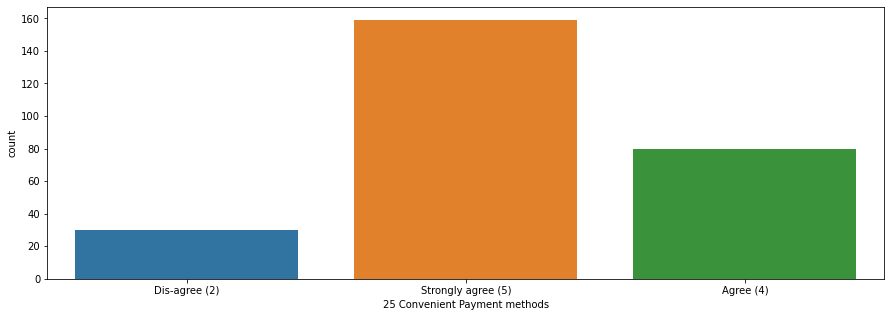

In [32]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x="25 Convenient Payment methods", data=data)
print(data["25 Convenient Payment methods"].value_counts())

Strongly agree (5)    141
Agree (4)              86
Disagree (2)           30
indifferent  (3)       12
Name: 26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time, dtype: int64


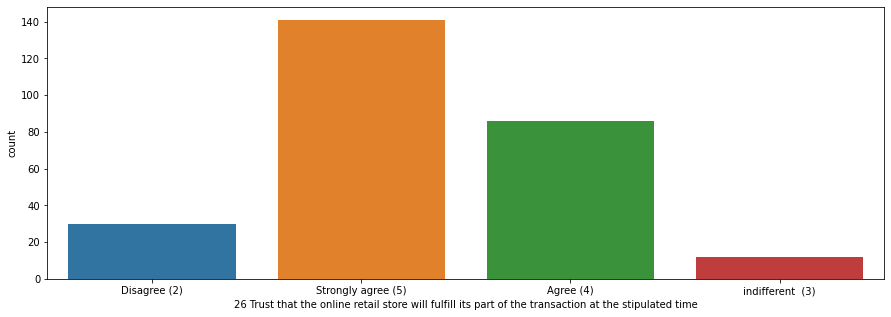

In [33]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x="26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time", data=data)
print(data["26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time"].value_counts())

Strongly agree (5)       194
Agree (4)                 42
Strongly disagree (1)     18
indifferent (3)           15
Name: 27 Empathy (readiness to assist with queries) towards the customers, dtype: int64


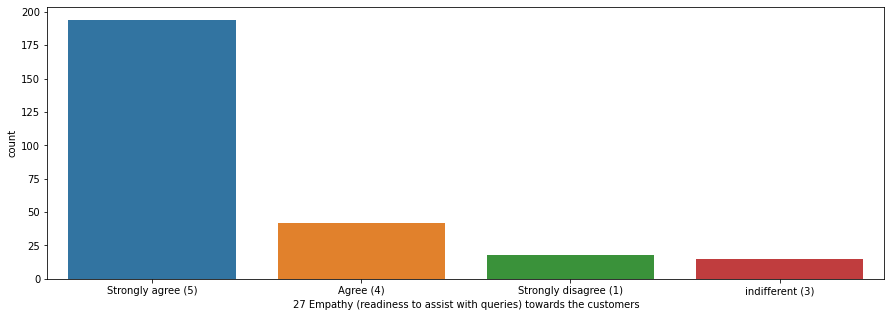

In [34]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x="27 Empathy (readiness to assist with queries) towards the customers", data=data)
print(data["27 Empathy (readiness to assist with queries) towards the customers"].value_counts())

Strongly agree (5)    185
Agree (4)              58
indifferent (3)        26
Name: 28 Being able to guarantee the privacy of the customer, dtype: int64


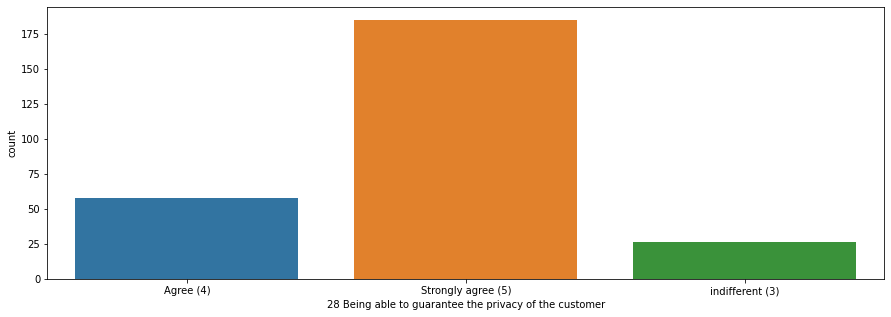

In [35]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x="28 Being able to guarantee the privacy of the customer", data=data)
print(data["28 Being able to guarantee the privacy of the customer"].value_counts())

Strongly agree (5)       149
Agree (4)                 94
indifferent (3)           15
Strongly disagree (1)     11
Name: 29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.), dtype: int64


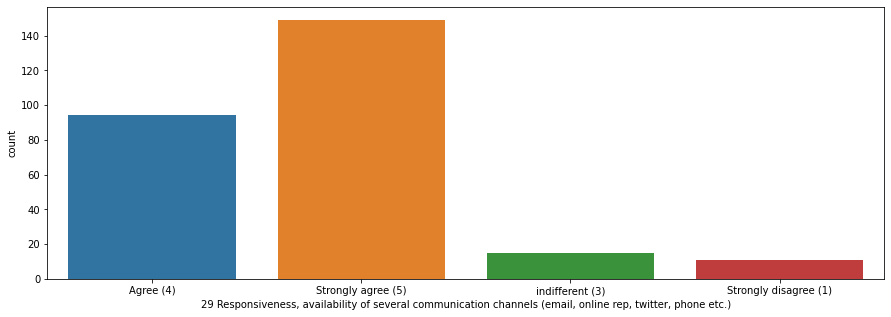

In [36]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x="29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)", data=data)
print(data["29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)"].value_counts())

Strongly agree (5)       105
Agree (4)                 85
indifferent (3)           50
Strongly disagree (1)     18
Dis-agree (2)             11
Name: 30 Online shopping gives monetary benefit and discounts, dtype: int64


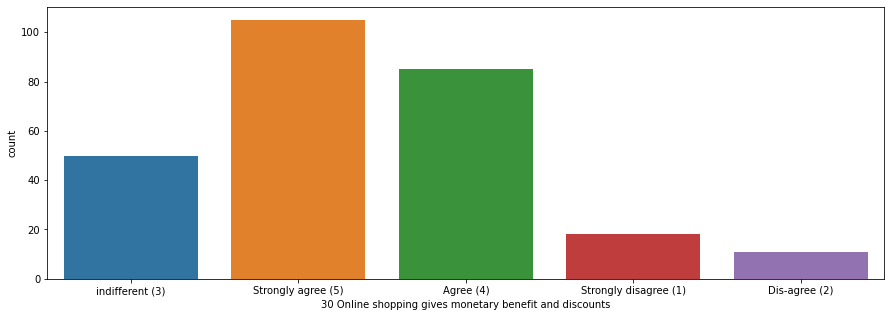

In [37]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x="30 Online shopping gives monetary benefit and discounts", data=data)
print(data["30 Online shopping gives monetary benefit and discounts"].value_counts())

Strongly agree (5)       86
indifferent (3)          75
Agree (4)                59
Strongly disagree (1)    30
Dis-agree (2)            19
Name: 31 Enjoyment is derived from shopping online, dtype: int64


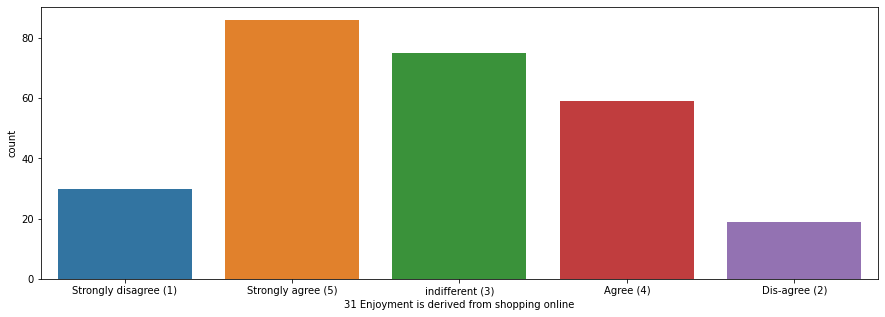

In [38]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x="31 Enjoyment is derived from shopping online", data=data)
print(data["31 Enjoyment is derived from shopping online"].value_counts())

Strongly agree (5)    146
Agree (4)              78
indifferent (3)        33
Dis-agree (2)          12
Name: 32 Shopping online is convenient and flexible, dtype: int64


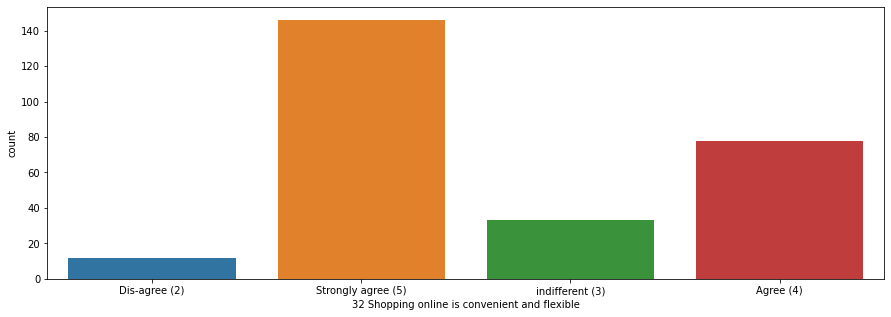

In [39]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x="32 Shopping online is convenient and flexible", data=data)
print(data["32 Shopping online is convenient and flexible"].value_counts())

Strongly agree (5)    198
Agree (4)              51
Dis-agree (2)          20
Name: 33 Return and replacement policy of the e-tailer is important for purchase decision, dtype: int64


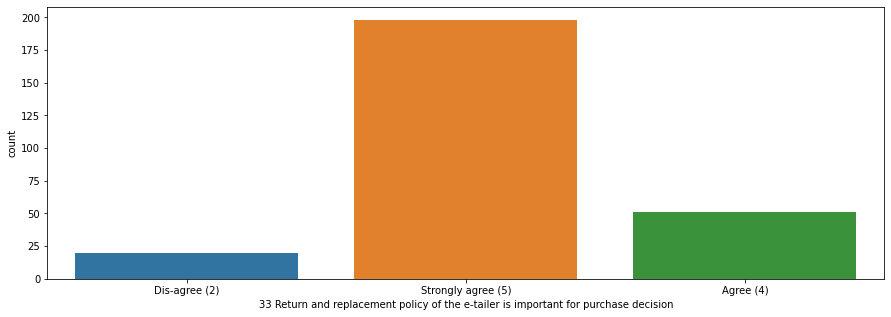

In [40]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x="33 Return and replacement policy of the e-tailer is important for purchase decision", data=data)
print(data["33 Return and replacement policy of the e-tailer is important for purchase decision"].value_counts())

Strongly agree (5)       115
Agree (4)                 64
indifferent (3)           64
Dis-agree (2)             15
Strongly disagree (1)     11
Name: 34 Gaining access to loyalty programs is a benefit of shopping online, dtype: int64


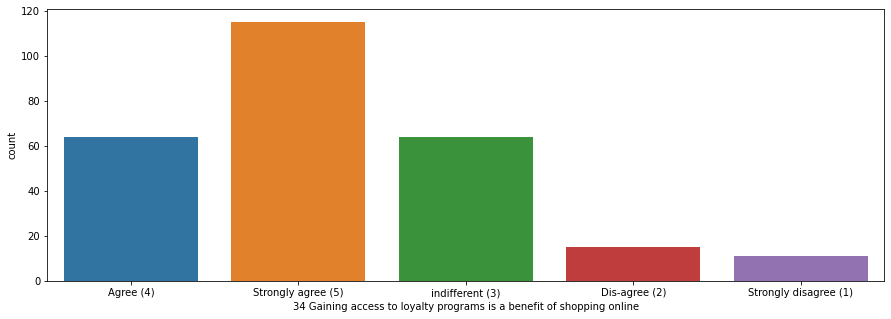

In [41]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x="34 Gaining access to loyalty programs is a benefit of shopping online", data=data)
print(data["34 Gaining access to loyalty programs is a benefit of shopping online"].value_counts())

Strongly agree (5)    133
Agree (4)              80
indifferent (3)        56
Name: 35 Displaying quality Information on the website improves satisfaction of customers, dtype: int64


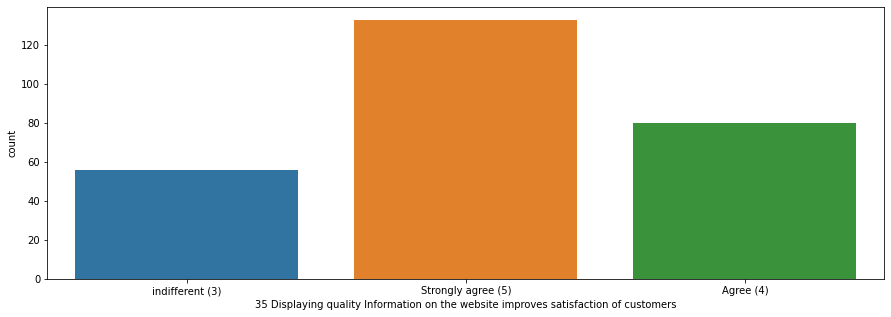

In [42]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x="35 Displaying quality Information on the website improves satisfaction of customers", data=data)
print(data["35 Displaying quality Information on the website improves satisfaction of customers"].value_counts())

Strongly agree (5)    175
Agree (4)              86
Dis-agree (2)           8
Name: 36 User derive satisfaction while shopping on a good quality website or application, dtype: int64


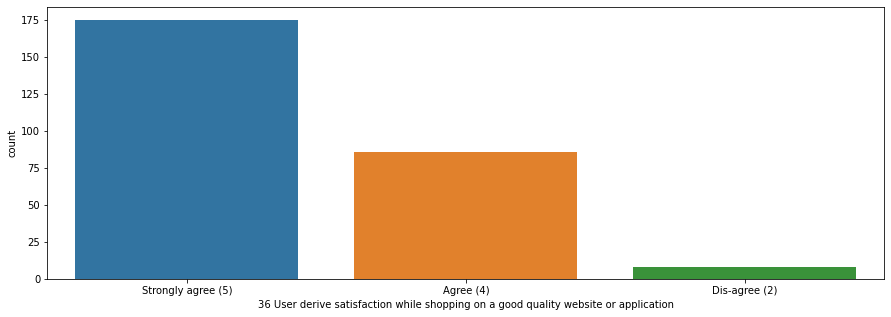

In [43]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x="36 User derive satisfaction while shopping on a good quality website or application", data=data)
print(data["36 User derive satisfaction while shopping on a good quality website or application"].value_counts())

Strongly agree (5)    164
Agree (4)              54
indifferent (3)        40
Dis-agree (2)          11
Name: 37 Net Benefit derived from shopping online can lead to users satisfaction, dtype: int64


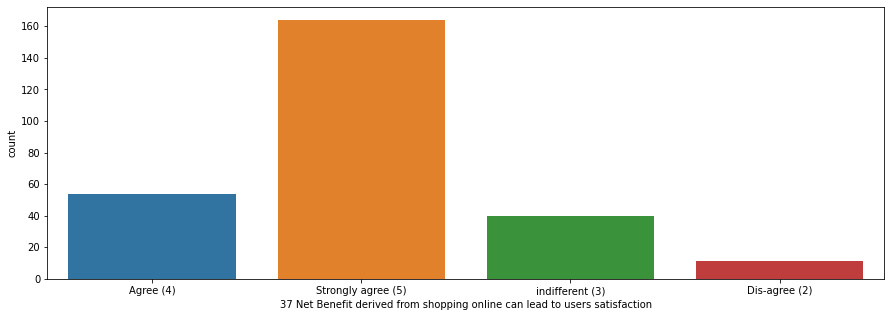

In [44]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x="37 Net Benefit derived from shopping online can lead to users satisfaction", data=data)
print(data["37 Net Benefit derived from shopping online can lead to users satisfaction"].value_counts())

Strongly agree (5)       122
Agree (4)                117
Strongly disagree (1)     18
Dis-agree (2)              7
indifferent (3)            5
Name: 38 User satisfaction cannot exist without trust, dtype: int64


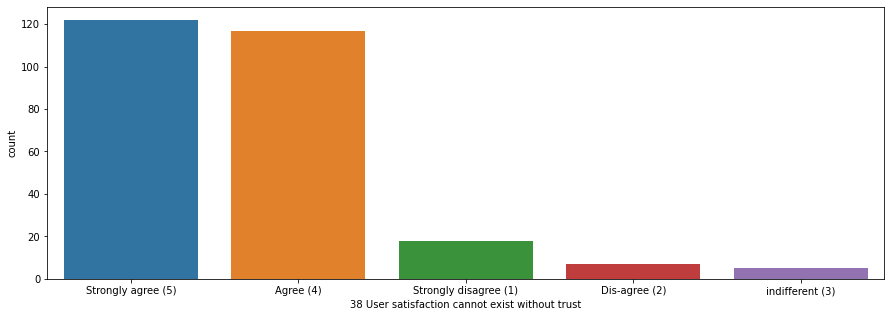

In [45]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x="38 User satisfaction cannot exist without trust", data=data)
print(data["38 User satisfaction cannot exist without trust"].value_counts())

Strongly agree (5)    111
Agree (4)              94
indifferent (3)        57
Dis-agree (2)           7
Name: 39 Offering a wide variety of listed product in several category, dtype: int64


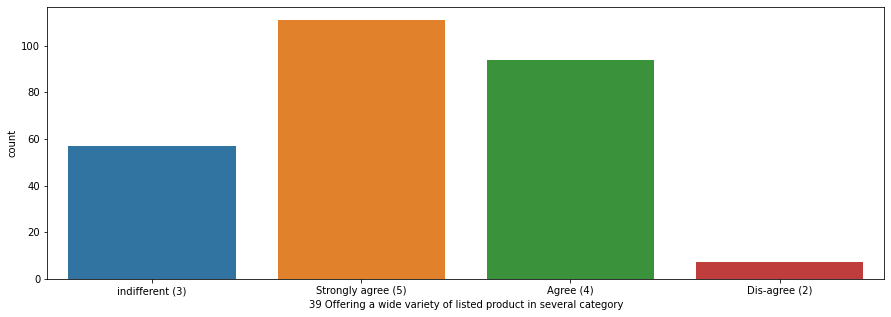

In [46]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x="39 Offering a wide variety of listed product in several category", data=data)
print(data["39 Offering a wide variety of listed product in several category"].value_counts())

Strongly agree (5)    135
Agree (4)              98
indifferent (3)        31
Disagree (2)            5
Name: 40 Provision of complete and relevant product information, dtype: int64


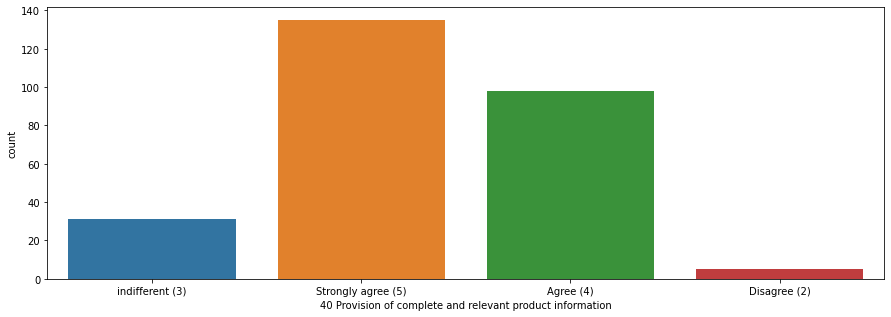

In [47]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x="40 Provision of complete and relevant product information", data=data)
print(data["40 Provision of complete and relevant product information"].value_counts())

Strongly agree (5)    148
Agree (4)              75
Disagree (2)           31
indifferent (3)        15
Name: 41 Monetary savings, dtype: int64


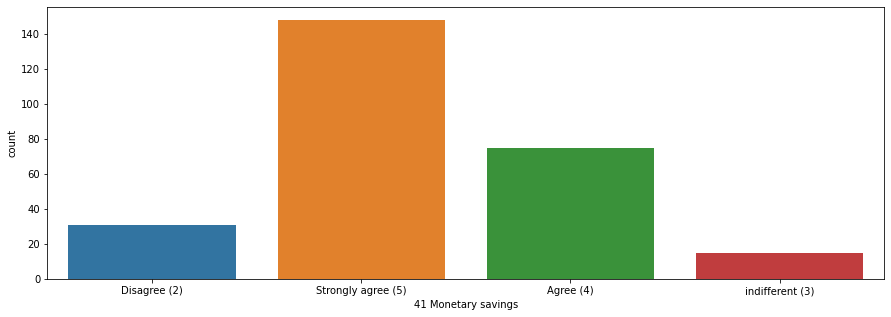

In [48]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x="41 Monetary savings", data=data)
print(data["41 Monetary savings"].value_counts())

Agree (4)             138
indifferent (3)        77
Strongly agree (5)     54
Name: 42 The Convenience of patronizing the online retailer, dtype: int64


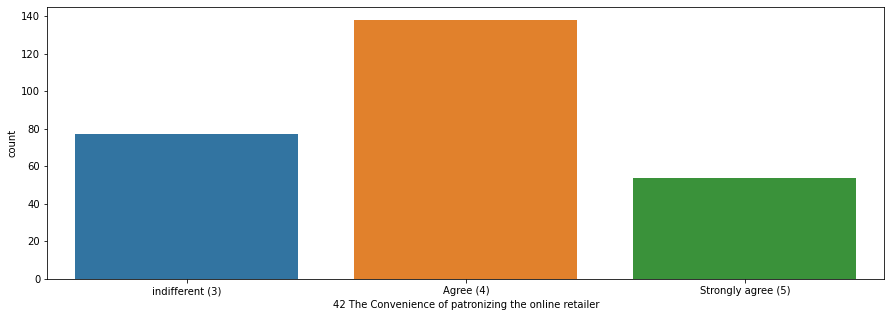

In [49]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x="42 The Convenience of patronizing the online retailer", data=data)
print(data["42 The Convenience of patronizing the online retailer"].value_counts())

Agree (4)                101
indifferent (3)           59
Strongly agree (5)        54
Dis-agree (2)             50
Strongly disagree (1)      5
Name: 43 Shopping on the website gives you the sense of adventure, dtype: int64


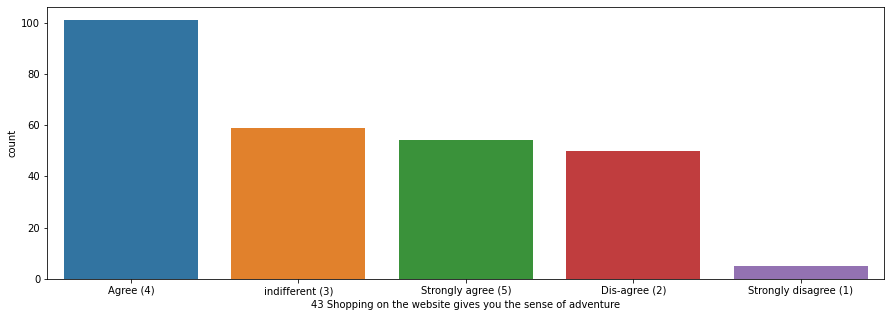

In [50]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x="43 Shopping on the website gives you the sense of adventure", data=data)
print(data["43 Shopping on the website gives you the sense of adventure"].value_counts())

indifferent (3)          100
Agree (4)                 59
Strongly agree (5)        48
Strongly disagree (1)     33
Dis-agree (2)             29
Name: 44 Shopping on your preferred e-tailer enhances your social status, dtype: int64


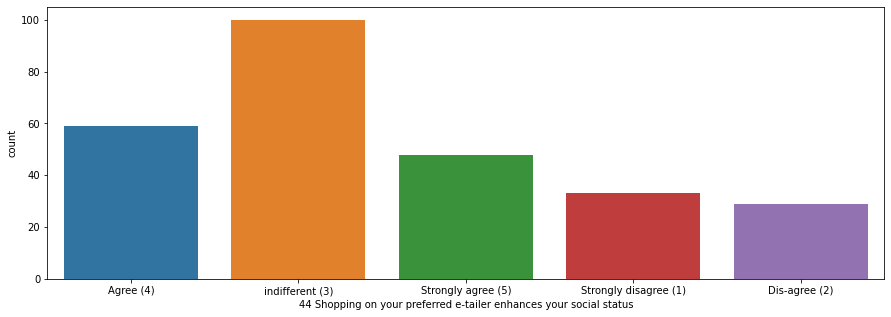

In [51]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x="44 Shopping on your preferred e-tailer enhances your social status", data=data)
print(data["44 Shopping on your preferred e-tailer enhances your social status"].value_counts())

indifferent (3)          101
Strongly agree (5)        65
Agree (4)                 63
Disagree (2)              22
Strongly disagree (1)     18
Name: 45 You feel gratification shopping on your favorite e-tailer, dtype: int64


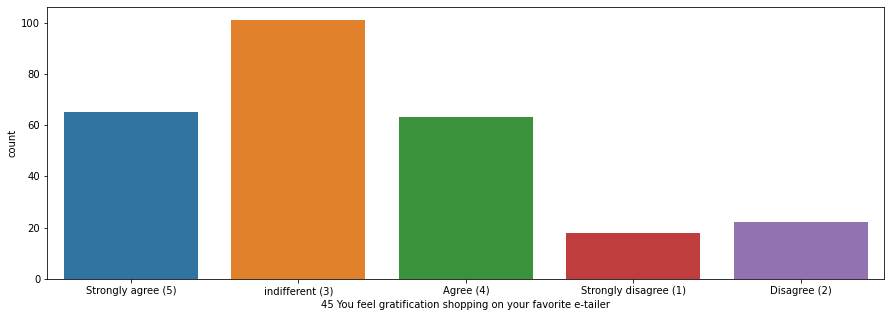

In [52]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x="45 You feel gratification shopping on your favorite e-tailer", data=data)
print(data["45 You feel gratification shopping on your favorite e-tailer"].value_counts())

Agree (4)                88
indifferent (3)          88
Strongly agree (5)       38
Strongly disagree (1)    33
Dis-agree (2)            22
Name: 46 Shopping on the website helps you fulfill certain roles, dtype: int64


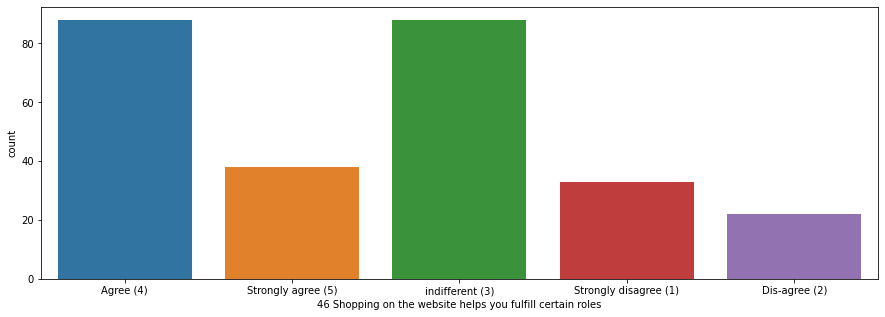

In [53]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x="46 Shopping on the website helps you fulfill certain roles", data=data)
print(data["46 Shopping on the website helps you fulfill certain roles"].value_counts())

Agree (4)             149
Strongly agree (5)     82
indifferent (3)        38
Name: 47 Getting value for money spent, dtype: int64


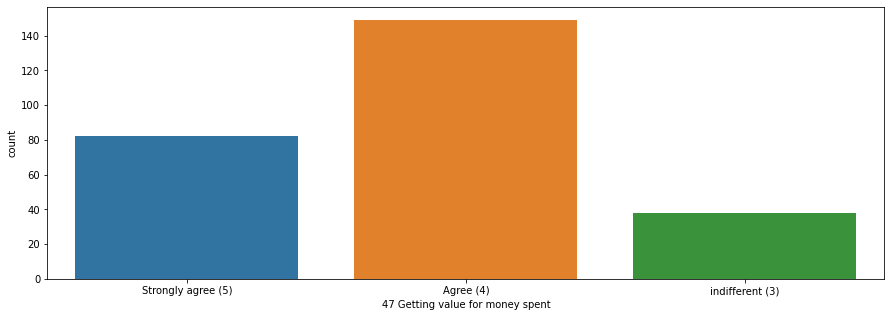

In [54]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x="47 Getting value for money spent", data=data)
print(data["47 Getting value for money spent"].value_counts())

In [56]:
print(data["From the following, tick any (or all) of the online retailers you have shopped from;                                                                           "].value_counts())

Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    82
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               44
Amazon.in, Flipkart.com                                         32
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                29
Amazon.in, Flipkart.com, Snapdeal.com                           27
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in                                                       16
Amazon.in, Paytm.com                                            12
Amazon.in, Flipkart.com, Paytm.com                               7
Name: From the following, tick any (or all) of the online retailers you have shopped from;                                                                           , dtype: int64


In [58]:
print(data["Easy to use website or application"].value_counts())

Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    64
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               44
Amazon.in, Flipkart.com                                         44
Amazon.in                                                       29
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                22
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in, Flipkart.com, Myntra.com                             19
Paytm.com                                                       12
Flipkart.com                                                     8
Amazon.in, Paytm.com                                             7
Name: Easy to use website or application, dtype: int64


In [59]:
print(data["Visual appealing web-page layout"].value_counts())

Amazon.in, Flipkart.com                                         87
Amazon.in                                                       44
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    36
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in, Myntra.com                                           15
Myntra.com                                                      15
Flipkart.com, Myntra.com                                        15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Flipkart.com                                                    12
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                11
Name: Visual appealing web-page layout, dtype: int64


In [60]:
print(data["Wild variety of product on offer"].value_counts())

Amazon.in, Flipkart.com                              130
Amazon.in                                             43
Amazon.in, Myntra.com                                 20
Flipkart.com, Myntra.com                              15
Myntra.com                                            15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com     14
Amazon.in, Flipkart.com, Paytm.com                    13
Flipkart.com                                          12
Paytm.com                                              7
Name: Wild variety of product on offer, dtype: int64


In [61]:
print(data["Complete, relevant description information of products"].value_counts())

Amazon.in, Flipkart.com                                         100
Amazon.in                                                        43
Amazon.in, Flipkart.com, Paytm.com                               24
Amazon.in, Paytm.com, Myntra.com                                 20
Amazon.in, Flipkart.com, Myntra.com                              15
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com     15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com                14
Snapdeal.com                                                     12
Flipkart.com, Snapdeal.com                                       11
Flipkart.com                                                      8
Amazon.in, Flipkart.com, Snapdeal.com                             7
Name: Complete, relevant description information of products, dtype: int64


In [62]:
print(data["Fast loading website speed of website and application"].value_counts())

Amazon.in                                                       51
Amazon.in, Paytm.com                                            44
Amazon.in, Flipkart.com, Myntra.com                             30
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    30
Amazon.in, Flipkart.com                                         30
Amazon.in, Flipkart.com, Snapdeal.com                           25
Amazon.in, Flipkart.com, Paytm.com                              25
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Snapdeal.com                                                    12
Flipkart.com                                                     8
Name: Fast loading website speed of website and application, dtype: int64


In [63]:
print(data["Reliability of the website or application"].value_counts())

Amazon.in                                            61
Amazon.in, Flipkart.com                              50
Amazon.in, Flipkart.com, Paytm.com                   36
Amazon.in, Paytm.com, Myntra.com                     35
Amazon.in, Flipkart.com, Snapdeal.com                18
Myntra.com                                           15
Flipkart.com                                         15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com    14
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com     13
Paytm.com                                            12
Name: Reliability of the website or application, dtype: int64


In [64]:
print(data["Quickness to complete purchase"].value_counts())

Amazon.com                                                   66
Amazon.com, Flipkart.com, Paytm.com                          47
Amazon.com, Flipkart.com                                     37
Amazon.com, Flipkart.com, Myntra.com                         30
Paytm.com                                                    25
Amazon.com, Paytm.com, Myntra.com                            20
Amazon.com, Flipkart.com, Paytm.com, Myntra.com, Snapdeal    15
Flipkart.com                                                 15
Flipkart.com, Myntra.com, Snapdeal                           14
Name: Quickness to complete purchase, dtype: int64


In [66]:
print(data["Availability of several payment options"].value_counts())

Amazon.in, Flipkart.com                                         65
Amazon.in, Flipkart.com, Myntra.com                             40
Amazon.in, Flipkart.com, Patym.com, Myntra.com, Snapdeal.com    39
Amazon.in                                                       23
Patym.com, Myntra.com                                           20
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               19
Amazon.in, Flipkart.com, Snapdeal.com                           18
Flipkart.com, Myntra.com, Snapdeal.com                          14
Patym.com                                                       12
Amazon.in, Patym.com                                            11
Flipkart.com                                                     8
Name: Availability of several payment options, dtype: int64


In [67]:
print(data["Speedy order delivery "].value_counts())

Amazon.in                                 107
Amazon.in, Flipkart.com                    82
Amazon.in, Flipkart.com, Snapdeal.com      36
Amazon.in, Flipkart.com, Myntra.com        15
Flipkart.com                               15
Flipkart.com, Myntra.com, Snapdeal.com     14
Name: Speedy order delivery , dtype: int64


In [68]:
print(data["Privacy of customers’ information"].value_counts())

Amazon.in                                                       71
Amazon.in, Flipkart.com                                         54
Amazon.in, Flipkart.com, Myntra.com                             25
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    24
Paytm.com                                                       18
Myntra.com                                                      15
Amazon.in, Paytm.com                                            15
Flipkart.com                                                    15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Amazon.in, Flipkart.com, Paytm.com                              11
Amazon.in, Flipkart.com, Snapdeal.com                            7
Name: Privacy of customers’ information, dtype: int64


In [69]:
print(data["Security of customer financial information"].value_counts())

Amazon.in                                                       51
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    42
Flipkart.com                                                    33
Amazon.in, Flipkart.com, Snapdeal.com                           25
Amazon.in, Flipkart.com                                         24
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in, Snapdeal.com                                         19
Myntra.com                                                      15
Paytm.com                                                       15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Amazon.in, Flipkart.com, Paytm.com                              11
Name: Security of customer financial information, dtype: int64


In [71]:
print(data["Perceived Trustworthiness"].value_counts())

Amazon.in                                                       76
Amazon.in, Flipkart.com, Snapdeal.com                           36
Amazon.in, Myntra.com                                           35
Amazon.in, Flipkart.com                                         31
Flipkart.com                                                    27
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               25
Myntra.com                                                      15
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    13
Amazon.in, Flipkart.com, Paytm.com                              11
Name: Perceived Trustworthiness, dtype: int64


In [73]:
print(data["Presence of online assistance through multi-channel"].value_counts())

Amazon.in, Flipkart.com, Myntra.com, Snapdeal    61
Amazon.in                                        60
Amazon.in, Flipkart.com                          39
Amazon.in, Snapdeal                              26
Myntra.com                                       20
Amazon.in, Flipkart.com, Myntra.com              15
Amazon.in, Myntra.com                            15
Amazon.in, Flipkart.com, Paytm.com               13
Paytm.com                                        12
Flipkart.com                                      8
Name: Presence of online assistance through multi-channel, dtype: int64


In [75]:
print(data["Longer time to get logged in (promotion, sales period)"].value_counts())

Amazon.in                                57
Amazon.in, Flipkart.com                  38
Paytm.com                                38
Myntra.com                               35
Amazon.in, Flipkart.com, Snapdeal.com    29
Snapdeal.com                             25
Flipkart.com, Paytm.com                  15
Flipkart.com, Paytm.com, Snapdeal.com    13
Amazon.in, Paytm.com                     11
Flipkart.com                              8
Name: Longer time to get logged in (promotion, sales period), dtype: int64


In [76]:
print(data["Longer time in displaying graphics and photos (promotion, sales period)"].value_counts())

Amazon.in, Flipkart.com                60
Amazon.in                              39
Myntra.com                             35
Snapdeal.com                           34
Myntra.com, Snapdeal.com               25
Flipkart.com, Snapdeal.com             19
Paytm.com                              15
Flipkart.com                           15
Amazon.in, Myntra.com, Snapdeal.com    14
Amazon.in, Paytm.com                   13
Name: Longer time in displaying graphics and photos (promotion, sales period), dtype: int64


In [77]:
print(data["Late declaration of price (promotion, sales period)"].value_counts())

Myntra.com                 75
Paytm.com                  52
snapdeal.com               41
Flipkart.com               38
Amazon.in                  38
Amazon.in, Paytm.com       13
Paytm.com, snapdeal.com     7
Amazon.in, Flipkart.com     5
Name: Late declaration of price (promotion, sales period), dtype: int64


In [78]:
print(data["Longer page loading time (promotion, sales period)"].value_counts())

Myntra.com                          61
Paytm.com                           59
Flipkart.com                        32
Snapdeal.com                        23
Amazon.in, Flipkart.com             18
Amazon.in                           16
Paytm.com, Snapdeal.com             15
Amazon.in, Snapdeal.com             14
Amazon.in, Paytm.com                13
Flipkart.com, Snapdeal.com          11
Amazon.in, Paytm.com, Myntra.com     7
Name: Longer page loading time (promotion, sales period), dtype: int64


In [79]:
print(data["Limited mode of payment on most products (promotion, sales period)"].value_counts())

Snapdeal.com                87
Amazon.in                   62
Flipkart.com                31
Amazon.in, Flipkart.com     29
Paytm.com                   25
Paytm.com, Snapdeal.com     15
Amazon.in, Paytm.com        13
Myntra.com, Snapdeal.com     7
Name: Limited mode of payment on most products (promotion, sales period), dtype: int64


In [81]:
print(data["Longer delivery period"].value_counts())

Paytm.com                  72
Snapdeal.com               64
Flipkart.com               44
Amazon.in                  37
Paytm.com, Snapdeal.com    26
Myntra.com                 26
Name: Longer delivery period, dtype: int64


In [83]:
print(data["Change in website/Application design"].value_counts())

Amazon.in                   96
Paytm.com                   63
Amazon.in, Flipkart.com     45
Myntra.com                  30
Flipkart.com                20
Snapdeal.com                 8
Flipkart.com, Myntra.com     7
Name: Change in website/Application design, dtype: int64


In [84]:
print(data["Frequent disruption when moving from one page to another"].value_counts())

Amazon.in                     53
Myntra.com                    52
Snapdeal.com                  49
Paytm.com                     39
Flipkart.com                  26
Amazon.in, Flipkart.com       25
Myntra.com, Snapdeal.com      14
Flipkart.com, Snapdeal.com    11
Name: Frequent disruption when moving from one page to another, dtype: int64


In [86]:
print(data["Website is as efficient as before"].value_counts())

Amazon.in                             94
Flipkart.com                          47
Amazon.in, Flipkart.com               45
Amazon.in, Flipkart.com, Paytm.com    25
Amazon.in, Paytm.com                  18
Paytm.com                             15
Myntra.com, Snapdeal.com              14
Snapdeal.com                          11
Name: Website is as efficient as before, dtype: int64


In [88]:
print(data["Which of the Indian online retailer would you recommend to a friend?"].value_counts())

Amazon.in                                            79
Amazon.in, Flipkart.com                              62
Flipkart.com                                         39
Amazon.in, Myntra.com                                30
Amazon.in, Paytm.com, Myntra.com                     20
Amazon.in, Flipkart.com, Myntra.com                  15
Amazon.in, Paytm.com                                 13
Flipkart.com, Paytm.com, Myntra.com, snapdeal.com    11
Name: Which of the Indian online retailer would you recommend to a friend?, dtype: int64


# Encoding object data type

In [89]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

for column in data:
    if data[column].dtype=='object':
        df=enc.fit_transform(data[column])
        data[column]=df

# Statistical Analysis

In [90]:
for column in data:
    print('---------', column, '---------')
    print(data[column].describe())
    print('\n')

--------- 1Gender of respondent ---------
count    269.000000
mean       0.327138
std        0.470042
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: 1Gender of respondent, dtype: float64


--------- 2 How old are you?  ---------
count    269.000000
mean       1.330855
std        1.183774
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: 2 How old are you? , dtype: float64


--------- 3 Which city do you shop online from? ---------
count    269.000000
mean       4.494424
std        3.187687
min        0.000000
25%        2.000000
50%        4.000000
75%        7.000000
max       10.000000
Name: 3 Which city do you shop online from?, dtype: float64


--------- 4 What is the Pin Code of where you shop online from? ---------
count       269.000000
mean     220465.747212
std      140524.341051
min      110008.000000
25%      122018.000000
50%      201303.000000
75%      201310.